In [1]:
# imports
import os
os.sys.path.append(os.path.abspath(".."))

import tensorflow as tf

# from copy import deepcopy

import pandas as pd
import numpy as np
import h5py

from tqdm import tqdm

from matplotlib import pyplot as plt

# import json

# import notebooks_utils.analysis as utils
from notebooks_utils import visuals

# from IPython.display import display

import project.download_content as content
from project.utils import data
from project.model.loss import BBOX_REF

from project import train

from copy import deepcopy


# from keras.applications import VGG19, VGG16
from keras.preprocessing import image
# from keras.applications.vgg19 import preprocess_input as preprocess_19
# from keras.applications.vgg16 import preprocess_input as preprocess_16
# from keras.models import Model

# from keras import backend as K
# from keras import layers
from keras.optimizers import Adam, SGD

import pickle

from project.model.ssd_model_300 import ssd_model_300
from project.model.ssd_model_624 import ssd_model_624
from project.model.ssd_model_624_vgg_19 import ssd_model_624_vgg_19
from project.model.loss import SSDloss
# from project.model.iou import iou
# from project.model.smooth_l1 import smooth_l1

# from project.utils import data
datapath = os.path.join(content.DATAPATH, "MODEL", "part_data_300_vgg.h5")

anchors = BBOX_REF.references.values

tqdm.pandas()

Using TensorFlow backend.


In [2]:
images, X = train.load_data('1')

In [3]:
# show images with many bounding boxes
for i in range(8750):
    id, path = images[i]
    bboxes = X[i]
    if bboxes.shape[0] > 4:
        print(i, bboxes.shape[0])

2145 5
3462 6
4438 6
4657 5
5124 7
6203 6
6899 5
6910 5
7248 5
7549 5
7890 8
8202 7
8305 6


In [77]:
# chosen one image
num = 6899
id, path = images[num]
bboxes_raw = X[num]

def plt_img(img):
    image_bin = image.array_to_img(img)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_bin)
    
def plt_bboxes(img, bboxes):
    image_bin = image.array_to_img(img)
    
    visuals.draw_many_bboxes(image_bin, bboxes[:, -4:], label='ref')

    refs = [anchors[i] for i in BBOX_REF.match(bboxes[:, -4:])]
    visuals.draw_many_bboxes(image_bin, refs, label='anc', color="#ff0000");

## Image without change

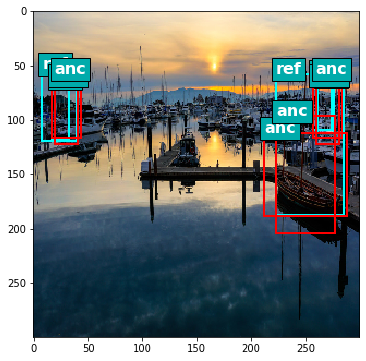

In [78]:
img_bin = image.load_img(path, target_size=(300, 300))
img = image.img_to_array(img_bin)

plt_img(img)
plt_bboxes(img, bboxes_raw)

## flip horizontaly

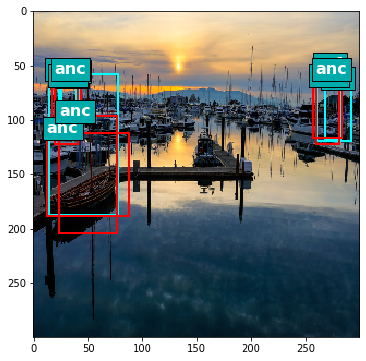

In [62]:
bboxes = deepcopy(bboxes_raw)

img_flip_h = np.flip(img, 1) 
bboxes[:, -4] = 1 - bboxes[:, -4]

plt_img(img_flip_h)
plt_bboxes(img, bboxes)

## flip vertically

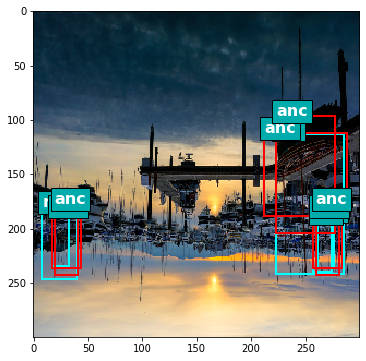

In [63]:
bboxes = deepcopy(bboxes_raw)

img_flip_v = np.flip(img, 0) 
bboxes[:, -3] = 1 - bboxes[:, -3] 

plt_img(img_flip_v)
plt_bboxes(img, bboxes)

## flip horizontaly and vertically

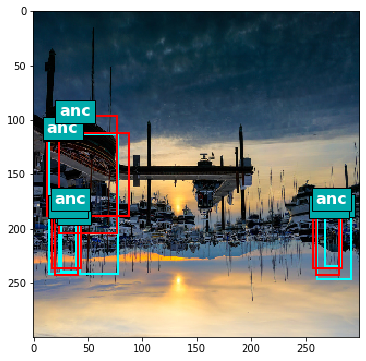

In [67]:
bboxes = deepcopy(bboxes_raw)

img_flip_h_v = np.flip(img, [0, 1])
bboxes[:, -4:-2] = 1 - bboxes[:, -4:-2]

plt_img(img_flip_h_v)
plt_bboxes(img, bboxes)

## zoom 1

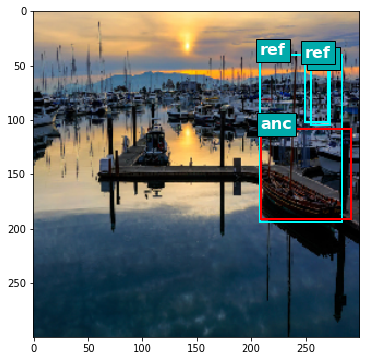

In [96]:
bboxes = deepcopy(bboxes_raw)

img_z, bboxes = train.resize(img, bboxes, .84, 0, .079)

plt_img(np.array(img_z))
plt_bboxes(img_z, bboxes)

## zoom 2

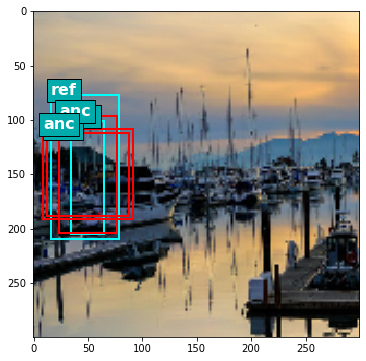

In [99]:
bboxes = deepcopy(bboxes_raw)

img_z, bboxes = train.resize(img, bboxes, .5, -.2, -.25)

plt_img(np.array(img_z))
plt_bboxes(img_z, bboxes)